# Show contributions to ComBind Score in a Heiracrchical Fashion

In [1]:
import sys
import os
import numpy as np
sys.path.append('/Users/jpaggi/Downloads/combind_code/')
from shared_paths import shared_paths
shared_paths['data'] = '/Users/jpaggi/Downloads/combind_data/bpp_data'

from score.density_estimate import DensityEstimate
from score.prob_opt import PredictStructs
from score.statistics import statistics
from containers import Protein

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from score.scores import ScoreContainer

prot = 'MEK1'
stats = 'stats7/stats'
scores = 'stats7/pdb/standard/1.0-mcss_contact_hbond_sb'
fname = 'pdb.sc'

root = '{}/{}/scores/{}'.format(shared_paths['data'], prot, scores)
stats_root = '{}/{}/scores/{}'.format(shared_paths['data'], prot, stats)
struct = '1S9J'

sc = ScoreContainer(root, stats_root, prot, struct)
cluster = sc.read_results(fname)

best_cluster = {}
for name, ligand in sc.ps.ligands.items():
    best_rmsd, best_pose = float('inf'), -1
    for i, pose in enumerate(ligand.poses[:100]):
        if pose.rmsd < best_rmsd:
            best_rmsd = pose.rmsd
            best_pose = i
    best_cluster[name] = best_pose

# Statistics for calculation

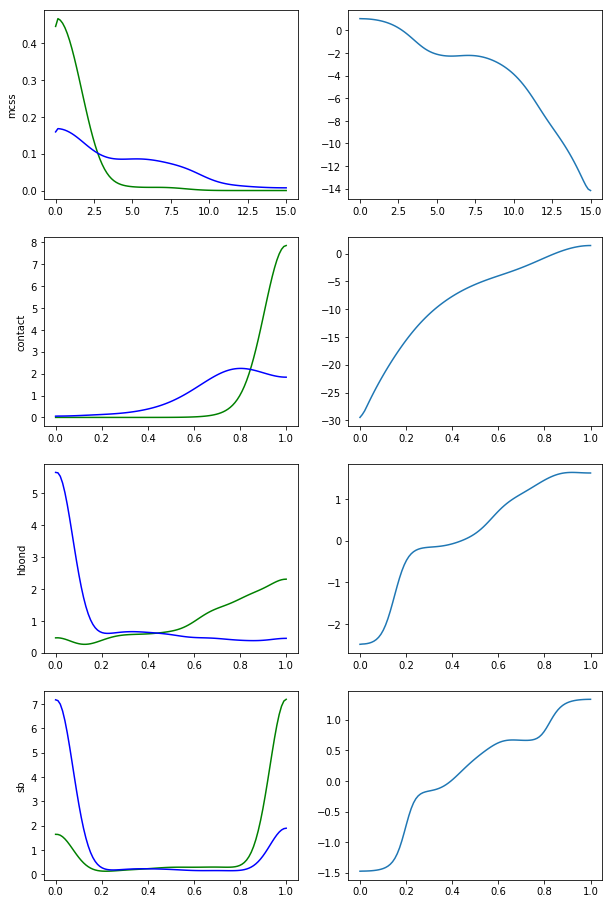

In [3]:
features = sc.settings['k_list']
f, ax = plt.subplots(len(features), 2, figsize = (10, 4 * len(features)))

for i, feature in enumerate(sc.settings['k_list']):
    nat = sc.ps.stats['native'][feature]
    ref = sc.ps.stats['reference'][feature]
    ax[i, 0].plot(nat.x, nat.fx, c = 'g')
    ax[i, 0].plot(ref.x, ref.fx, c = 'b')
    
    ratio = nat.ratio(ref)
    ax[i, 1].plot(ratio.x, np.log(ratio.fx))
    
    ax[i, 0].set_ylabel(feature)
plt.show()

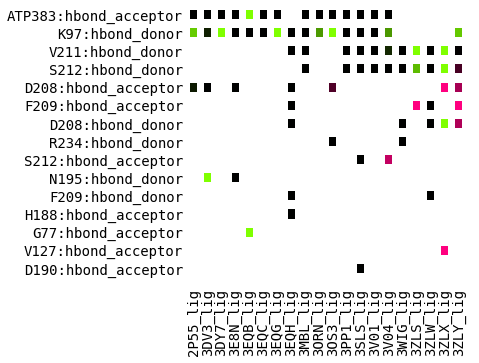

ComBind - Glide: 5.4518890996774765


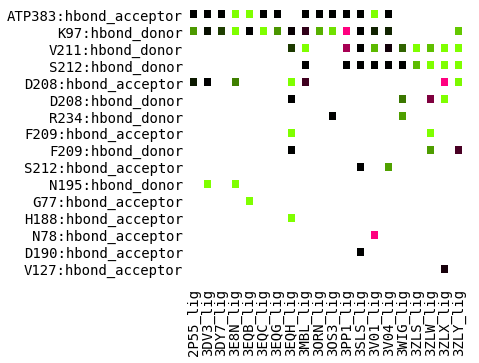

ComBind - Glide: 19.859491845758015


In [4]:
ligands = list(cluster)
sc.ps.gel_plot(cluster, {k: 0 for k, v in cluster.items()}, 'hbond', ligands)
sc.ps.gel_plot(cluster, best_cluster, 'hbond', ligands)

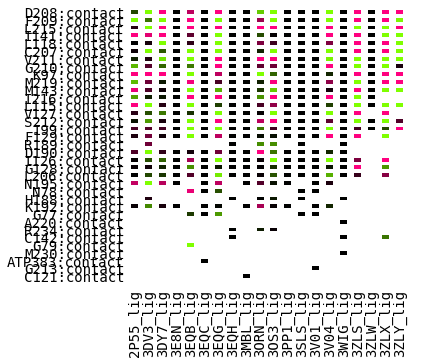

ComBind - Glide: -0.3697808118115544


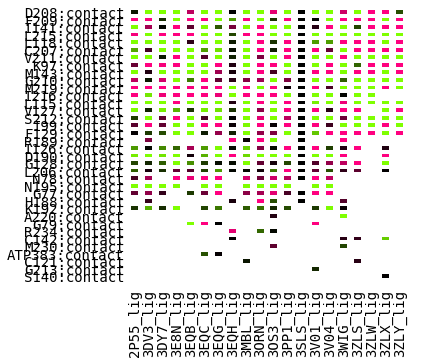

ComBind - Glide: 16.579606938825858


In [5]:
ligands = list(cluster)
sc.ps.gel_plot(cluster, {k: 0 for k, v in cluster.items()}, 'contact', ligands)
sc.ps.gel_plot(cluster, best_cluster, 'contact', ligands)

# Performance

3SLS_lig 3.12244667692
3ZLS_lig 9.00227537086
3ZLW_lig 10.1007298501
3ZLX_lig 9.88947315238
3ZLY_lig 9.77561624062


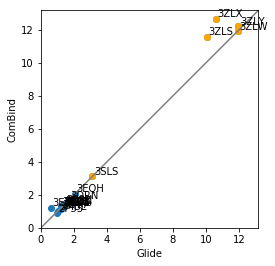

3SLS_lig 3.12244667692
3ZLS_lig 9.00227537086
3ZLW_lig 10.1007298501
3ZLX_lig 9.88947315238
3ZLY_lig 9.77561624062


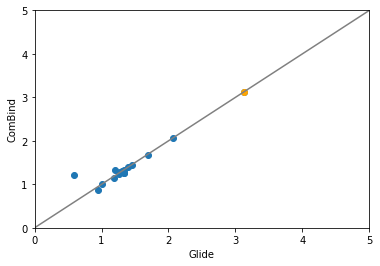

In [6]:
f, ax = plt.subplots(figsize = (4, 4))
ligands = list(cluster)
glide = [sc.ps.ligands[ligand].poses[0].rmsd for ligand in ligands]
combind = [sc.ps.ligands[ligand].poses[cluster[ligand]].rmsd for ligand in ligands]
best = [min(pose.rmsd for pose in sc.ps.ligands[ligand].poses)
        for ligand in ligands]

def plot():
    plt.scatter(glide, combind)
    for b, g, c, ligand in zip(best, glide, combind, ligands):
        if b >= 2.0:
            print(ligand, b)
            plt.scatter([g], [c], c = 'orange')

    for i, txt in enumerate(ligands):
        txt = txt.replace('_lig', '')
        ax.annotate(txt, (glide[i]+.1, combind[i]+.1))

    m = max(glide+combind)
    plt.ylim(0, m+.5)
    plt.xlim(0, m+.5)
    plt.plot([0, m+.5], [0, m+.5], c = 'grey')
    ax.set_aspect('equal')
    plt.xlabel('Glide')
    plt.ylabel('ComBind')
    
plot()
plt.show()

plot()
plt.ylim(0, 5)
plt.xlim(0, 5)
plt.show()

# Energy Differences

mcss
0.6742192472576023


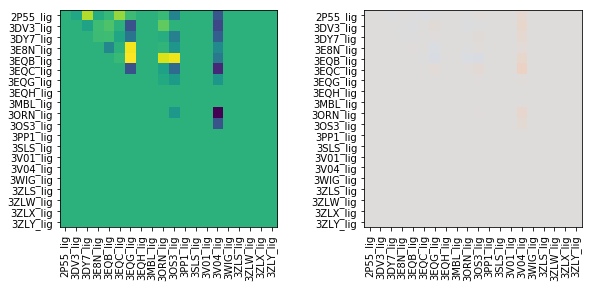

contact
18.303894701777494


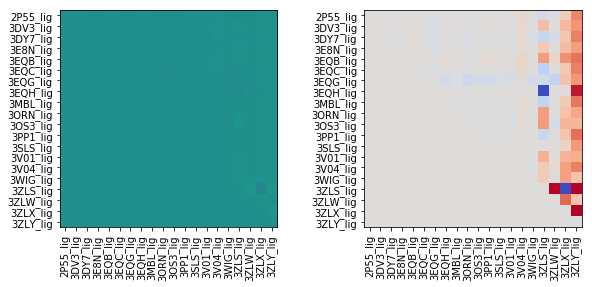

hbond
95.25690841986456


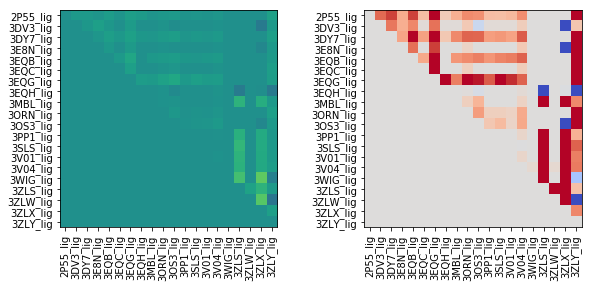

sb
0.029881201629760934


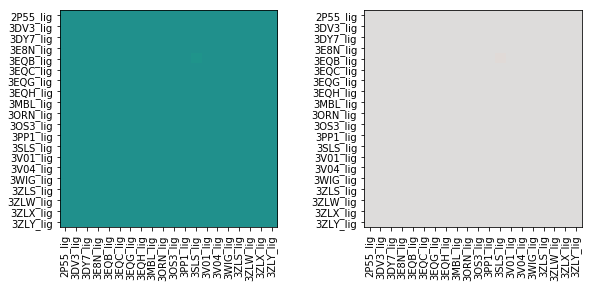

In [7]:
for feature in sc.settings['k_list']:
    
    mut = {k:0 for k, v in cluster.items()}
    x, like =  sc.ps.likelihood_and_feature_matrix(cluster, feature, ligands)
    x_mut, like_mut =  sc.ps.likelihood_and_feature_matrix(mut, feature, ligands)

    print(feature)
    print(np.sum(like-like_mut))

    f, ax = plt.subplots(1, 2, figsize = (10, 4))
    if feature != 'mcss':
        ax[0].imshow(x-x_mut, vmin = -2, vmax = 2)
    else:
        ax[0].imshow(x-x_mut)
    ax[0].set_yticks(range(len(ligands)))
    ax[0].set_xticks(range(len(ligands)))
    ax[0].set_yticklabels(ligands)
    ax[0].set_xticklabels(ligands, rotation = 'vertical')


    cb = ax[1].imshow(like-like_mut, cmap = 'coolwarm', vmin = -1, vmax = 1)
    ax[1].set_yticks(range(len(ligands)))
    ax[1].set_xticks(range(len(ligands)))
    ax[1].set_yticklabels(ligands)
    ax[1].set_xticklabels(ligands, rotation = 'vertical')
    plt.show()

In [8]:
ligand = '2BRB_lig'
pose = 38
for feature in sc.settings['k_list']:
    
    mut = {k:v for k, v in cluster.items()}
    mut[ligand] = pose
    x, like =  sc.ps.likelihood_and_feature_matrix(cluster, feature, ligands)
    x_mut, like_mut =  sc.ps.likelihood_and_feature_matrix(mut, feature, ligands)

    print(feature)
    print(np.sum(like-like_mut))
    print(np.sum(like))
    print(np.sum(like_mut))

    f, ax = plt.subplots(1, 2, figsize = (10, 4))
    if feature != 'mcss':
        ax[0].imshow(x-x_mut, vmin = -2, vmax = 2)
    else:
        ax[0].imshow(x-x_mut)
    ax[0].set_yticks(range(len(ligands)))
    ax[0].set_xticks(range(len(ligands)))
    ax[0].set_yticklabels(ligands)
    ax[0].set_xticklabels(ligands, rotation = 'vertical')


    cb = ax[1].imshow(like-like_mut, cmap = 'coolwarm', vmin = -1, vmax = 1)
    ax[1].set_yticks(range(len(ligands)))
    ax[1].set_xticks(range(len(ligands)))
    ax[1].set_yticklabels(ligands)
    ax[1].set_xticklabels(ligands, rotation = 'vertical')
    plt.show()

mcss


ValueError: operands could not be broadcast together with shapes (20,20) (21,21) 

In [ ]:
# Energy of combind pose in context of best_cluster
# - energy in best pose in context of best_cluster

# Negative scores mean that the the best pose is favored.

ligand = '2BRB_lig'
pose = 38

best_cluster[ligand] = cluster[ligand]

for feature in sc.settings['k_list']:
    
    mut = {k:v for k, v in best_cluster.items()}
    mut[ligand] = pose
    x, like =  sc.ps.likelihood_and_feature_matrix(best_cluster, feature, ligands)
    x_mut, like_mut =  sc.ps.likelihood_and_feature_matrix(mut, feature, ligands)
    
    print(feature)
    print('diff:', np.sum(like-like_mut))
    
    print('like:', np.sum(like))
    print('like_mut:', np.sum(like_mut))

    f, ax = plt.subplots(1, 2, figsize = (10, 4))
    if feature != 'mcss':
        ax[0].imshow(x-x_mut, vmin = -2, vmax = 2)
    else:
        ax[0].imshow(x-x_mut)
    ax[0].set_yticks(range(len(ligands)))
    ax[0].set_xticks(range(len(ligands)))
    ax[0].set_yticklabels(ligands)
    ax[0].set_xticklabels(ligands, rotation = 'vertical')


    cb = ax[1].imshow(like-like_mut, cmap = 'coolwarm', vmin = -1, vmax = 1)
    ax[1].set_yticks(range(len(ligands)))
    ax[1].set_xticks(range(len(ligands)))
    ax[1].set_yticklabels(ligands)
    ax[1].set_xticklabels(ligands, rotation = 'vertical')
    plt.show()